# Birthweight Regression Model
 - By Marius Heje Mæhle

In [33]:
# importing needed libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './__datasets/birthweight_low.xlsx'


# reading the file into Python
birth = pd.read_excel(file)


# outputting the first ten rows of the dataset to check the data
birth.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827
5,26,12.0,1,10.0,24,12.0,8,9,6,8,1,0,0,1,0,0,1,2778
6,26,13.0,7,11.0,42,NaN,9,9,2,4,1,0,1,0,1,0,0,3170
7,26,11.0,1,12.0,44,12.0,9,9,10,4,1,0,1,0,0,1,0,3310
8,26,16.0,2,10.0,24,16.0,9,9,11,4,1,0,1,0,0,1,0,3730
9,26,12.0,1,12.0,32,12.0,9,9,6,0,1,0,1,0,0,1,0,3912


In [34]:
# INFOrmation about each variable
birth.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    352 non-null    int64  
 1   meduc   349 non-null    float64
 2   monpre  352 non-null    int64  
 3   npvis   349 non-null    float64
 4   fage    352 non-null    int64  
 5   feduc   345 non-null    float64
 6   omaps   352 non-null    int64  
 7   fmaps   352 non-null    int64  
 8   cigs    352 non-null    int64  
 9   drink   352 non-null    int64  
 10  male    352 non-null    int64  
 11  mwhte   352 non-null    int64  
 12  mblck   352 non-null    int64  
 13  moth    352 non-null    int64  
 14  fwhte   352 non-null    int64  
 15  fblck   352 non-null    int64  
 16  foth    352 non-null    int64  
 17  bwght   352 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 49.6 KB


# Missing Values

In [35]:
#checking for NAs
birth.isna().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

Missing values is in : 
   meduc - mother's education. 
   npvis -  total number of prenatal visits. 
   feduc -  father's educ, years.  
   
   

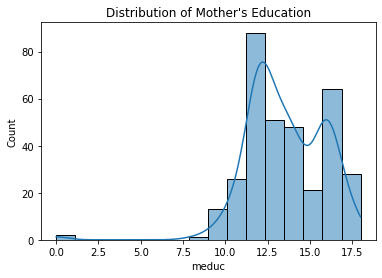

In [36]:
# creating a dropped dataset to visualize 'meduc'
df_dropped = birth.dropna()


# displaying the plot for 'meduc'
sns.histplot(x = "meduc",
            data = df_dropped,
            kde = True)


# title and labels
plt.title("""Distribution of Mother's Education""")


# displaying the plot
plt.show()

In [37]:
# imputing everything else with the zero

# meduc
fill = 0
birth['meduc'] = birth['meduc'].fillna(value = fill)


# npvis
fill = 0
birth['npvis'] = birth['npvis'].fillna(value = fill)

# feduc
fill = 0
birth['feduc'] = birth['feduc'].fillna(value = fill)

In [38]:
# making sure all missing values have been taken care of
birth.isnull().any(axis = 0).any(axis = 0)

False

# Correlation

In [39]:
# developing a correlation matrix based on the continuous features
birth_corr = birth.corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birth_corr.loc[ : , "bwght"].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
fmaps     0.46
omaps     0.45
npvis     0.28
meduc     0.21
feduc     0.19
moth      0.10
foth      0.05
mblck     0.04
fblck     0.03
monpre    0.02
male      0.02
fwhte    -0.07
mwhte    -0.14
mage     -0.48
cigs     -0.57
fage     -0.58
drink    -0.67
Name: bwght, dtype: float64

# Histograms
- To check for their normal distributions and if it's needed to do any log

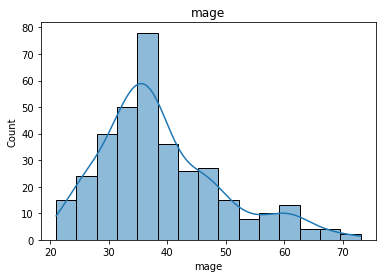

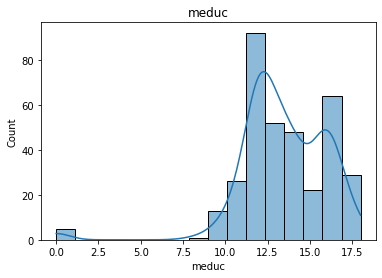

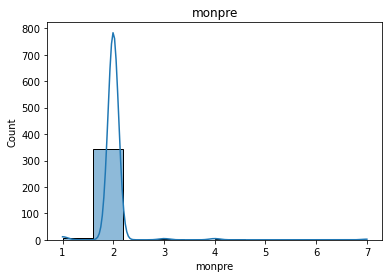

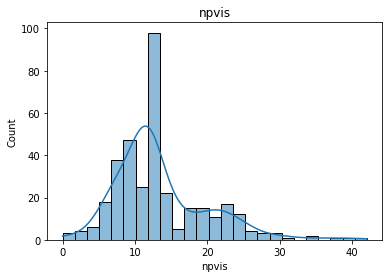

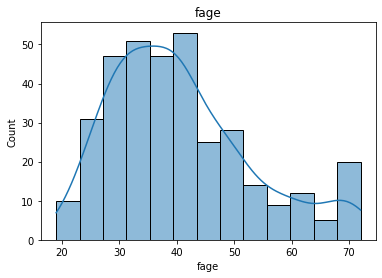

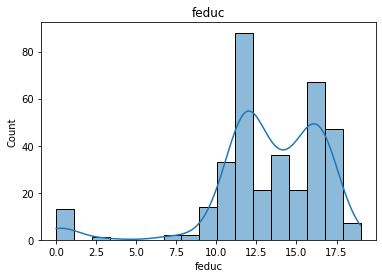

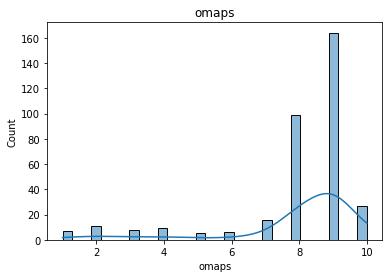

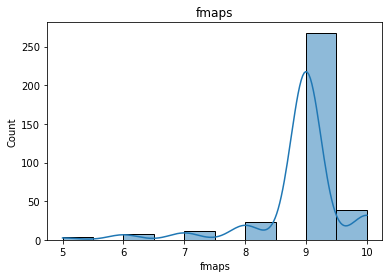

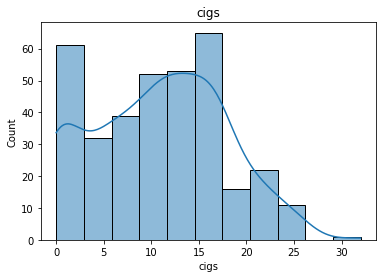

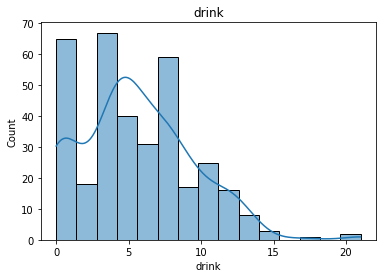

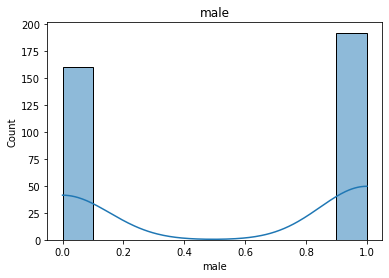

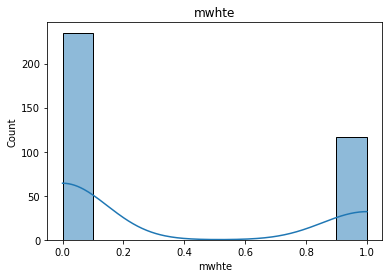

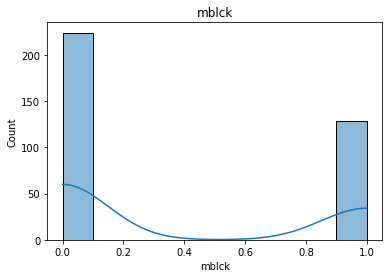

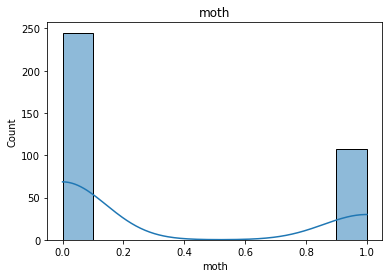

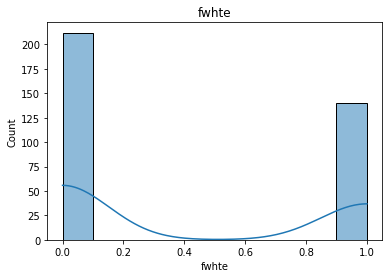

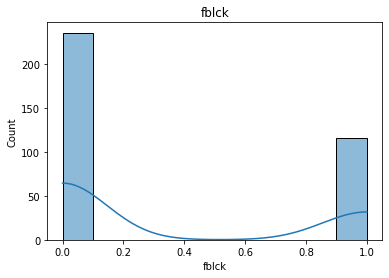

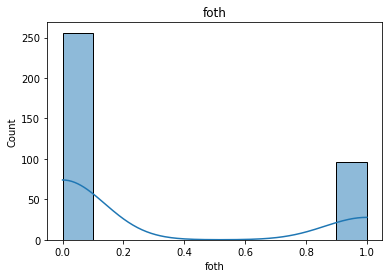

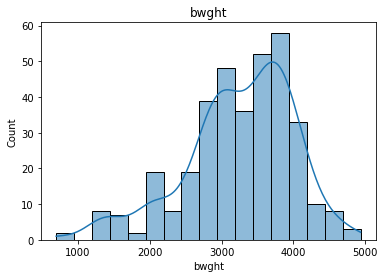

In [40]:
# developing histograms using HISTPLOT for all the data variables
for feature in birth:
    sns.histplot(data   = birth,
             x      = feature,
             kde    = True)


    # title and axis labels
    plt.title(label   = feature)
    plt.xlabel(xlabel = feature) # to avoid using the dataset labels
    plt.ylabel(ylabel = "Count")

    # displaying the histogram
    plt.show()

In [41]:
# log transforming bwght and saving it to the dataset
birth['log_bwght'] = np.log(birth['bwght'])

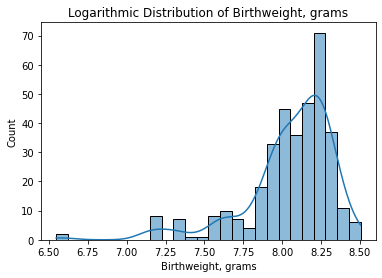

In [42]:
# developing a histogram for log_bwght
sns.histplot(data   = birth,
             x      = 'log_bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birthweight, grams")
plt.xlabel(xlabel = "Birthweight, grams") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# Correlation

In [43]:
# developing a correlation matrix based on continuous features
birth_corr = birth.corr(method = 'pearson')

# filtering the results to only show correlations with log_bwght
birth_corr.loc[ : , "log_bwght"].round(decimals = 2).sort_values(ascending = False)

log_bwght    1.00
bwght        0.97
fmaps        0.54
omaps        0.51
npvis        0.29
meduc        0.27
feduc        0.24
moth         0.12
foth         0.08
monpre       0.02
mblck        0.02
fblck       -0.00
male        -0.02
fwhte       -0.07
mwhte       -0.14
mage        -0.49
cigs        -0.58
fage        -0.62
drink       -0.65
Name: log_bwght, dtype: float64

# OLS - Regression Building and Results

In [44]:
# preparing explanatory variable data
birth_data = birth.drop('log_bwght', axis = 1)


# preparing response variables
birth_target = birth.loc[ : , 'log_bwght']
#log_birth_target = birth.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birth_data, #x data
            birth_target, #y data
            test_size = 0.25, #size of training set
            random_state = 219) # lock in random sequence

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (264, 18)
y-side: (264,)


Testing Data
------------
X-side: (88, 18)
y-side: (88,)



In [45]:
# declaring set of x-variables
x_variables = ['mage', 'meduc', 'monpre',
               'npvis', 'fage', 'feduc',
               #'omaps', #'fmaps', 
               'cigs',
               'drink', 'male', 'mwhte', 'mblck',
               'moth', 'fwhte', 'fblck', 'foth']
# dropping the ones with no relevance (ompas, fmaps)


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +


In [46]:
# merging X_train and y_train so that they can be used in statsmodels
birth_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                        meduc + 
                                        monpre +
                                        npvis + 
                                        fage + 
                                        feduc +
                                        cigs +
                                        drink +
                                        male +
                                        mwhte +
                                        mblck +
                                        moth + 
                                        fwhte + 
                                        fblck + 
                                        foth""",
                                data = birth)
                                        #not used - omaps + fmaps +


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     39.34
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.01e-59
Time:                        21:14:42   Log-Likelihood:                -2670.6
No. Observations:                 352   AIC:                             5369.
Df Residuals:                     338   BIC:                             5423.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2431.8313    165.316     14.710      0.0

In [47]:
# declaring a new set of x-variables
x_variables = [
                #'mage', 'meduc', 'monpre',
               'npvis', 'fage', 
                #'feduc',
               #'omaps', #'fmaps', 
               'cigs',
               'drink', 
                #'male', 
                'mwhte', 'mblck',
               'moth', 'fwhte', 'fblck', 'foth']
# dropping the ones with no relevance (ompas, fmaps) and significant p-value


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

npvis +
fage +
cigs +
drink +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +


In [48]:
# merging X_train and y_train so that they can be used in statsmodels
birth_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_bwght ~ 
                                        npvis + 
                                        fage + 
                                        cigs +
                                        drink +
                                        mwhte +
                                        mblck +
                                        moth + 
                                        fwhte + 
                                        fblck + 
                                        foth""",
                                data = birth)
#not used - omaps + fmaps + mage + meduc + monpre + feduc + male
#Drropped the variables which wasnt relevant or to high p-value (not significant). 

# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     69.90
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.94e-67
Time:                        21:14:42   Log-Likelihood:                 109.71
No. Observations:                 352   AIC:                            -201.4
Df Residuals:                     343   BIC:                            -166.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1011      0.026    192.516      0.0

# Model Development in scikit-learn
- Creating OLS, LASSO, and ARD

In [49]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birth.loc[ : , x_variables  ]


# preparing response variable
birth_target = birth.loc[ : , 'log_bwght' ]


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birth_data,     # x-variables
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birth_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

# OLS

In [50]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6028
OLS Testing Score  : 0.6481
OLS Train-Test Gap : 0.0453


In [51]:
# zipping each feature name to its coefficient
lr_model_values = zip(birth_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 8.49)
('npvis', 0.01)
('fage', -0.01)
('cigs', -0.01)
('drink', -0.02)
('mwhte', -0.06)
('mblck', -0.01)
('moth', 0.07)
('fwhte', -0.02)
('fblck', 0.04)
('foth', -0.02)


# LASSO

In [52]:
import sklearn.linear_model #import linear model

In [53]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.0
Lasso Testing Score  : -0.0002
Lasso Train-Test Gap : 0.0002


/Users/mariushejemaehle/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [54]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birth_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 8.05)
('mage', -0.0)
('meduc', 0.0)
('monpre', 0.0)
('npvis', 0.0)
('fage', -0.0)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 0.0)
('cigs', -0.0)
('drink', -0.0)
('male', -0.0)
('mwhte', -0.0)
('mblck', 0.0)
('moth', 0.0)
('fwhte', -0.0)
('fblck', 0.0)
('foth', 0.0)
('bwght', 0.0)


In [55]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 8.05)
('meduc', 0.0)
('npvis', 0.0)
('feduc', 0.0)
('fmaps', 0.0)
('drink', -0.0)
('mwhte', -0.0)
('moth', 0.0)
('fblck', 0.0)
('bwght', 0.0)


# ARD

In [56]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.3092
Testing Score : 0.2688
ARD Train-Test Gap : 0.0404


/Users/mariushejemaehle/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [57]:
# zipping each feature name to its coefficient
ard_model_values = zip(birth_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 6.34)
('mage', 0.0)
('meduc', 0.0)
('monpre', 0.0)
('npvis', 0.0)
('fage', 0.0)
('feduc', 0.0)
('omaps', 0.0)
('fmaps', 0.18973)
('cigs', 0.0)
('drink', 0.0)
('male', 0.04487)
('mwhte', 0.0)
('mblck', 0.0)
('moth', 0.0)
('fwhte', 0.0)
('fblck', 0.0)
('foth', 0.0)
('bwght', 0.0)


In [58]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 6.34)
('meduc', 0.0)
('npvis', 0.0)
('feduc', 0.0)
('fmaps', 0.18973)
('drink', 0.0)
('male', 0.04487)
('mblck', 0.0)
('fwhte', 0.0)
('foth', 0.0)


# Comparing Results
- To choose the right model

In [59]:
# comparing results from the different models
print(f"""
Comparing Results:

Model       Train Score    Test Score      Train-Test Gap
-----       -----------    ----------      ----------
*OLS        {lr_train_score}         {lr_test_score}          {lr_test_gap}
Lasso       {lasso_train_score}           {lasso_test_score}          {lasso_test_gap}
ARD         {ard_train_score}         {ard_test_score}          {ard_test_gap}


*FINAL MODEL""")

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


#If needed, sending model results to Excel
model_performance.to_excel('./__model_results/linear_model_performance.xlsx',
                           index = False)

### Model Predictions ###

# The following code will generate an Excel file that outputs the birthweight,
#the predictions for each model, and the deviations on each prediction.
prediction_results = pd.DataFrame(data = {
    'Birthweight'          : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })

#If needed, sending model results to Excel
prediction_results.to_excel(excel_writer = './linear_model_predictions.xlsx',
                            index = False)


Comparing Results:

Model       Train Score    Test Score      Train-Test Gap
-----       -----------    ----------      ----------
*OLS        0.6028         0.6481          0.0453
Lasso       0.0           -0.0002          0.0002
ARD         0.3092         0.2688          0.0404


*FINAL MODEL
